### Project description

This project is about visualizing insights from expenses data provided from Privatbank bank statements.

Goals: 
- predict missing categories and clean up the data
- understand the most frequent expense
- find out the most costly category
- find out the weekday on which most money is spend
- find out the hour, or time range on which most money is spend
- predict last 50 expenses with logistic regression, compare with the real expenses


## Step 1: Explore the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("statements.csv")

In [3]:
df.head()

,Дата,Час,Категорія,Картка,Опис операції,Сума у валюті картки,Валюта картки,Сума у валюті транзакції,Валюта транзакції,Залишок на кінець періоду,Валюта залишку
0,04.12.2018,18:47,Туризм,Картка Універсальна (****2297),Послуги туризму та транспортних перевезень: Pr...,-2.50,грн,2.50,грн,762.17,грн
1,04.12.2018,18:34,Інше,Картка Універсальна (****2297),"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,грн,634.00,грн,764.67,грн
2,04.12.2018,14:33,Інше,Картка Універсальна (****2297),"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,грн,63.59,грн,130.67,грн
3,04.12.2018,13:15,Інше,Картка Універсальна (****2297),Оплата в інтернет-магазині,-265.00,грн,265.00,грн,194.26,грн
4,04.12.2018,00:54,Розваги,Картка Універсальна (****2297),"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,грн,2.49,дол,459.26,грн


In [4]:
df.dtypes

Дата                          object
Час                           object
Категорія                     object
Картка                        object
Опис операції                 object
Сума у валюті картки         float64
Валюта картки                 object
Сума у валюті транзакції     float64
Валюта транзакції             object
Залишок на кінець періоду    float64
Валюта залишку                object
dtype: object

## Step 2: Clean the data

Dropping columns that don't have important info, or the info is constant


In [5]:
df = df.drop(columns=["Валюта картки",
                        "Валюта залишку", "Картка"])

In [6]:
df.head()

,Дата,Час,Категорія,Опис операції,Сума у валюті картки,Сума у валюті транзакції,Валюта транзакції,Залишок на кінець періоду
0,04.12.2018,18:47,Туризм,Послуги туризму та транспортних перевезень: Pr...,-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,Розваги,"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26


### Renaming columns

In [7]:
df.rename(columns={'Дата': 'date',
                     'Час':'time',
                     'Категорія':'category',
                     'Опис операції':'description',
                     'Сума у валюті картки':'transaction',
                     'Сума у валюті транзакції':'abs',
                     'Валюта транзакції':'currency',
                     'Залишок на кінець періоду':'balance',
                    }, 
                 inplace=True)

In [8]:
df.head()

,date,time,category,description,transaction,abs,currency,balance
0,04.12.2018,18:47,Туризм,Послуги туризму та транспортних перевезень: Pr...,-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,Розваги,"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26


### Understanding the data

In [9]:
descriptions = df.description.unique()
for description in descriptions:
    print(description)

Послуги туризму та транспортних перевезень: PrivatQR, ID платежу 886558795
Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: Head Office
Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7
Оплата в інтернет-магазині
Музика: ITUNES.COM/BILL, ITUNES.COM
Переказ з карти ПриватБанку через додаток Приват24. Відправник: Захарченко Ірина Русланівна. Коментар до платежу: вiд Iри за квиточки Львiв Киiв Львiв.
Залізничні послуги: WWW.UZ.GOV.UA, KYIV
Переказ зі своєї карти 51**85 через додаток Приват24. Коментар до платежу: . Получатель: БАЦЕНКО ТЕТЯНА МАКСИМIВНА
Продукти: FOP SAVARYN A.I., LVIV
Ресторан: TRAPEZNA UCU, LVIV
Переказ з карти ПриватБанку через додаток Приват24. Відправник: Козак Олександр Андрійович. Коментар до платежу: . Получатель: БАЦЕНКО ТЕТЯНА МАКСИМIВНА
Продукти: Магазин продуктiв Близенько, Львiв, Угорская, 12
Предавторизація: UKLON.COM.UA
Предавторизація: Uber BV
Переказ зі своєї карти
Одяг: Одяг для всiєї сiм&apos;ї Дюна, Львiв, Кулиша, 20
Продукти: MAGAZYN ROSHEN M44, M.LVIV
Ресторан: 

In [10]:
categs = df.category.unique()
print('Number of categories', len(categs))
for category in categs:
    print(category)

('Number of categories', 10)
Туризм
Інше
Розваги
Продукти харчування
Кафе, бари, ресторани
Перекази
Поповнення мобільного
Видача готівки
Здоров'я
Одяг, взуття


#### Let's see, how many categories are labled as  'Інше' right now

In [11]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
5,03.12.2018,19:27,Інше,Переказ з карти ПриватБанку через додаток Прив...,393.00,393.00,грн,529.80
7,03.12.2018,19:01,Інше,Переказ зі своєї карти 51**85 через додаток Пр...,1000.00,1000.00,грн,1318.20
10,02.12.2018,22:16,Інше,Переказ з карти ПриватБанку через додаток Прив...,128.00,128.00,грн,391.05
11,02.12.2018,18:03,Інше,"Продукти: Магазин продуктiв Близенько, Львiв, ...",-88.00,88.00,грн,263.05
12,02.12.2018,00:22,Інше,Предавторизація: UKLON.COM.UA,-110.00,110.00,грн,351.05
13,01.12.2018,21:21,Інше,Предавторизація: Uber BV,-94.89,94.36,грн,461.05
14,01.12.2018,20:59,Інше,Переказ зі своєї карти 51**85 через додаток Пр...,500.00,500.00,грн,555.94


In [12]:
df.loc[df['category'] == 'Інше'].count()

date           60
time           60
category       60
description    60
transaction    60
abs            60
currency       60
balance        60
dtype: int64

### Understanding the keywords in transaction description and renaming them

In [13]:
df.head(50)

,date,time,category,description,transaction,abs,currency,balance
0,04.12.2018,18:47,Туризм,Послуги туризму та транспортних перевезень: Pr...,-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,Інше,"Продукти: Сильпо, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,Розваги,"Музика: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26
5,03.12.2018,19:27,Інше,Переказ з карти ПриватБанку через додаток Прив...,393.00,393.00,грн,529.80
6,03.12.2018,19:10,Туризм,"Залізничні послуги: WWW.UZ.GOV.UA, KYIV",-1181.40,1181.40,грн,136.80
7,03.12.2018,19:01,Інше,Переказ зі своєї карти 51**85 через додаток Пр...,1000.00,1000.00,грн,1318.20
8,03.12.2018,18:57,Продукти харчування,"Продукти: FOP SAVARYN A.I., LVIV",-45.60,45.60,грн,318.20
9,03.12.2018,15:50,"Кафе, бари, ресторани","Ресторан: TRAPEZNA UCU, LVIV",-27.25,27.25,грн,363.80


### From this data I'd divide the data into following categories based on various description: 
- TRAVEL - everything related to the railway or flight tickets, or hotels, or transactions that already have 'Туризм' category
- FOOD - all transactions related to buying something is supermarket
- FUN - monthly subscription to the music, cinema tickets, transactions that already have 'Розваги' category
- CLOTHES - buying something in a clothes store, corresponding keywords in description or already marked with appropriate category
- CAFE - eating out in a cafe or restorant or coffee
- TAXI - uklon, uber, or other taxi rides - defined from description
- PUBLIC TRANSPORT - subway or tram rides - keywords availible in the description.
- MONEY TRANSFER - transfer from one card to another. 
- HEALTH - pharmacy & medcenter transactions

#### Notice, that some transactions have category 'Інше' but at the same time enough information in the description to predict it's true category.

Let's define some description keywords which will be used as a category names later on.

In [14]:
df['description'] = df['description'].replace(
    {
        'Ресторан': 'CAFE',
        'Кафе': 'CAFE',
        'Кава': 'CAFE',
        'Туризм': 'TRAVEL',
        'Залізничні': 'TRAVEL',
        'Продукти': 'FOOD',
        'Сильпо': 'FOOD',
        'Продукти харчування': 'FOOD',
        'Музика': 'FUN',
        'Розваги': 'FUN',
        'KINOMARKET': 'FUN',
        'Одяг': 'CLOTHES',
        'ЛИМУЗИНЫ': 'TAXI',
        'UKLON': 'TAXI',
        'Uber': 'TAXI',
        'UBER': 'TAXI',
        'Таксі': 'TAXI',
        'Здоров\'я': 'HEALTH',
        'Медицина': 'HEALTH',
        'Аптека': 'HEALTH',
        'Послуги туризму та транспортних перевезень': 'PUBLIC TRANSPORT',
        'Переказ': 'MONEY TRANSFER',
        'Перекази': 'MONEY TRANSFER'
    }, regex=True)

### Label categories where possible

In [15]:
df.loc[df.description.str.contains("TAXI"), "category"] = "TAXI"

In [16]:
df.loc[df.description.str.contains("FOOD"), "category"] = "FOOD"

In [17]:
df.loc[df.description.str.contains("FUN"), "category"] = "FUN"
df.loc[df.category.str.contains("Розваги"), "category"] = "FUN"

In [18]:
df.loc[df.description.str.contains("CLOTHES"), "category"] = "CLOTHES"

In [19]:
df.loc[df.description.str.contains("CAFE"), "category"] = "CAFE"

In [20]:
df.loc[df.description.str.contains("TRAVEL"), "category"] = "TRAVEL"
df.loc[df.category.str.contains("Туризм"), "category"] = "TRAVEL"

In [21]:
df.loc[df.description.str.contains("PUBLIC TRANSPORT"), "category"] = "PUBLIC TRANSPORT"

In [22]:
df.loc[df.description.str.contains("TRAPEZNA"), "category"] = "TRAPEZNA"

In [23]:
df.loc[df.description.str.contains("MONEY TRANSFER"), "category"] = "MONEY TRANSFER"
df.loc[df.description.str.contains("Перекази"), "category"] = "MONEY TRANSFER"

In [24]:
df.loc[df.description.str.contains("HEALTH"), "category"] = "HEALTH"

In [25]:
df.head(200)

,date,time,category,description,transaction,abs,currency,balance
0,04.12.2018,18:47,PUBLIC TRANSPORT,"PUBLIC TRANSPORT: PrivatQR, ID платежу 886558795",-2.50,2.50,грн,762.17
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
2,04.12.2018,14:33,FOOD,"FOOD: FOOD, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
4,04.12.2018,00:54,FUN,"FUN: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26
5,03.12.2018,19:27,MONEY TRANSFER,MONEY TRANSFER з карти ПриватБанку через додат...,393.00,393.00,грн,529.80
6,03.12.2018,19:10,TRAVEL,"TRAVEL послуги: WWW.UZ.GOV.UA, KYIV",-1181.40,1181.40,грн,136.80
7,03.12.2018,19:01,MONEY TRANSFER,MONEY TRANSFER зі своєї карти 51**85 через дод...,1000.00,1000.00,грн,1318.20
8,03.12.2018,18:57,FOOD,"FOOD: FOP SAVARYN A.I., LVIV",-45.60,45.60,грн,318.20
9,03.12.2018,15:50,TRAPEZNA,"CAFE: TRAPEZNA UCU, LVIV",-27.25,27.25,грн,363.80


##### See how many columns now have 'Інше' category

In [26]:
df.loc[df['category'] == 'Інше']

,date,time,category,description,transaction,abs,currency,balance
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26
30,29.11.2018,14:42,Інше,#5168 **** **** 2297 БАЦЕНКО ТЕТЯНА МАКСИМ?ВНА...,9.99,9.99,грн,376.20
53,15.11.2018,10:47,Інше,Зарахування переказу на карту Roman Batsenko,547.30,547.30,грн,1303.31
64,12.11.2018,13:45,Інше,ПОКУПКА ТОВАРА,-40.00,40.00,грн,687.01
67,11.11.2018,19:28,Інше,"Універмаг: CGN Heinem. Duty Free, Koeln",-32.05,1.00,євро,963.61
76,10.11.2018,19:52,Інше,"Універмаг: Heinemann Duty Free, Frankfurt",-330.13,10.30,євро,1112.38
100,05.11.2018,11:29,Інше,"Телеком послуги: TAXER, ID платежу 861314198",-405.00,405.00,грн,1500.81
117,02.11.2018,13:41,Інше,"Подарунки/Іграшки: EMOZZI, ID платежу 859167644",-1099.00,1099.00,грн,4963.40
121,01.11.2018,17:47,Інше,"Подарунки/Іграшки: Bodo, ID платежу 858502210",-1025.00,1025.00,грн,524.40


In [27]:
df.loc[df['category'] == 'Інше'].count()

date           13
time           13
category       13
description    13
transaction    13
abs            13
currency       13
balance        13
dtype: int64

### Plot balance through time

In [28]:
import numpy as np

Populating the interactive namespace from numpy and matplotlib


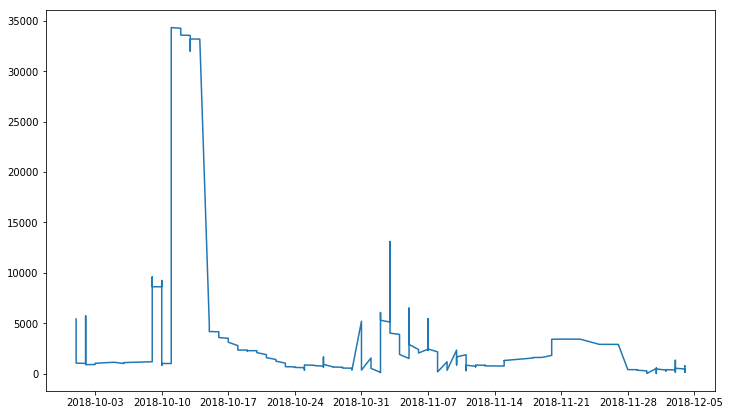

In [29]:
import matplotlib.pyplot as plt
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 7)   # Change the size of plots
 
from datetime import datetime
date_objects = [datetime.strptime(date, '%d.%m.%Y').date() for date in df.date]
plt.plot(date_objects, df.balance)


### Add weekdays to the data

In [30]:
import pandas as pd

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = [weekdays[date.weekday()] for date in date_objects]


#### Sum of transactions

In [31]:
df['transaction'].sum()

340.7100000000005

### Grouping expenses by categories

In [32]:
categories = df.category.unique()
for categ in categories:
    print(categ)

PUBLIC TRANSPORT
Інше
FOOD
FUN
MONEY TRANSFER
TRAVEL
TRAPEZNA
TAXI
CLOTHES
CAFE
Поповнення мобільного
Видача готівки
Перекази
HEALTH


In [33]:
for categ in categories: 
    print(categ)
    print(df.loc[df['category'] == categ].transaction.sum())
    print()

PUBLIC TRANSPORT
-611.22
()
Інше
-10569.89
()
FOOD
-4267.55
()
FUN
-960.73
()
MONEY TRANSFER
37731.15
()
TRAVEL
-2011.69
()
TRAPEZNA
-712.5
()
TAXI
-1322.5900000000001
()
CLOTHES
-1488.94
()
CAFE
-6110.71
()
Поповнення мобільного
-486.0
()
Видача готівки
-5305.36
()
Перекази
85.0
()
HEALTH
-3628.26
()


### From what we see there are both incomes and expenses, for now, our main point of interest are expenses. 

In [34]:
df.head()

,date,time,category,description,transaction,abs,currency,balance,weekday
0,04.12.2018,18:47,PUBLIC TRANSPORT,"PUBLIC TRANSPORT: PrivatQR, ID платежу 886558795",-2.50,2.50,грн,762.17,Tuesday
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67,Tuesday
2,04.12.2018,14:33,FOOD,"FOOD: FOOD, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67,Tuesday
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26,Tuesday
4,04.12.2018,00:54,FUN,"FUN: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26,Tuesday


In [35]:
df.transaction.sum()

340.7100000000005

In [36]:
expenses = df[df.category != "Перекази"]
expenses = expenses[expenses.category != "MONEY TRANSFER"]

In [37]:
expenses.transaction.sum()

-37475.439999999995

### Now we have only expenses and finally can understand where did the money go.

In [38]:
expenses_by_category = [] # let's create a dictionary;

categories = expenses.category.unique()
for categ in categories: 
    print(categ)
    expense = expenses.loc[expenses['category'] == categ].transaction.sum()
    print(expense)
    expenses_by_category.append(abs(expense))
    print("_______________")



PUBLIC TRANSPORT
-611.22
_______________
Інше
-10569.89
_______________
FOOD
-4267.55
_______________
FUN
-960.73
_______________
TRAVEL
-2011.69
_______________
TRAPEZNA
-712.5
_______________
TAXI
-1322.5900000000001
_______________
CLOTHES
-1488.94
_______________
CAFE
-6110.71
_______________
Поповнення мобільного
-486.0
_______________
Видача готівки
-5305.36
_______________
HEALTH
-3628.26
_______________


In [39]:
expenses_by_category
categs = []

for categ in categories: 
    categs.append(categ)
categs

['PUBLIC TRANSPORT',
 '\xd0\x86\xd0\xbd\xd1\x88\xd0\xb5',
 'FOOD',
 'FUN',
 'TRAVEL',
 'TRAPEZNA',
 'TAXI',
 'CLOTHES',
 'CAFE',
 '\xd0\x9f\xd0\xbe\xd0\xbf\xd0\xbe\xd0\xb2\xd0\xbd\xd0\xb5\xd0\xbd\xd0\xbd\xd1\x8f \xd0\xbc\xd0\xbe\xd0\xb1\xd1\x96\xd0\xbb\xd1\x8c\xd0\xbd\xd0\xbe\xd0\xb3\xd0\xbe',
 '\xd0\x92\xd0\xb8\xd0\xb4\xd0\xb0\xd1\x87\xd0\xb0 \xd0\xb3\xd0\xbe\xd1\x82\xd1\x96\xd0\xb2\xd0\xba\xd0\xb8',
 'HEALTH']

Text(0,0.5,'Transaction Type')

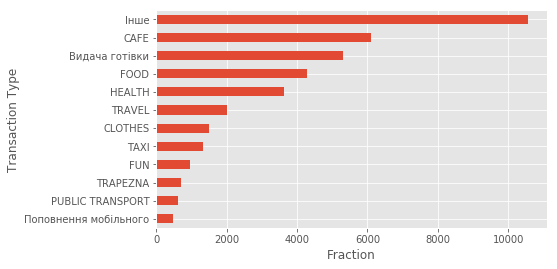

In [40]:
EXPENSES_CAT = pd.Series(expenses_by_category, 
                        index=categs)
df_EXP = pd.DataFrame({'expenses' : EXPENSES_CAT})
df_EXP = df_EXP.sort_values(by='expenses', ascending=True)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,4))
df_EXP.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Fraction')
ax.set_ylabel('Transaction Type')


Text(0,0.5,'')

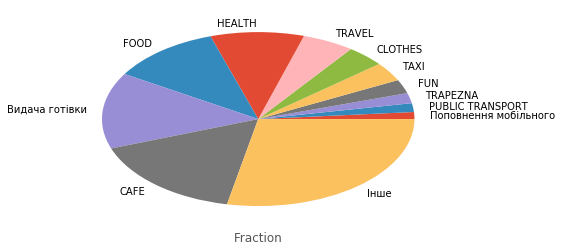

In [41]:
fig, ax = plt.subplots(figsize=(7,4))
df_EXP.plot(kind='pie', legend = False, ax=ax, subplots=True)
ax.set_xlabel('Fraction')
ax.set_ylabel('')

# Results

### The place where I spend money most frequently

In [42]:
most_frequent_desc = df['description'].value_counts().idxmax()

In [43]:
print(most_frequent_desc)
print("Spent money there {} times".format(len(df[df['description'] == most_frequent_desc])))
print("\nAmount spend there: ")
df[df.description == most_frequent_desc].transaction.sum()


CAFE: TRAPEZNA UCU, LVIV
Spent money there 30 times

Amount spend there: 


-712.5

### The  most frequent category 

In [44]:
most_frequent_category = df['category'].value_counts().idxmax()

In [45]:
print("The most frequent category of transactions is {}".format(most_frequent_category))
transactions_amount = len(df[df['category'] == most_frequent_category])
df_len = len(df)

percentage = float(transactions_amount) / float(df_len)

print("Amount of such transactions: {}".format(transactions_amount))
print("Relative percentage of such transactions: {}%".format(percentage * 100))

The most frequent category of transactions is MONEY TRANSFER
Amount of such transactions: 81
Relative percentage of such transactions: 32.4%


### Find out the weekday on which most money is spend


In [46]:
weekday_expenses = []
mean_weekday_expenses = []

for day in weekdays: 
    expense = expenses.loc[expenses['weekday'] == day].transaction.sum()
    mean_expense = expenses.loc[expenses['weekday'] == day].transaction.mean()
    weekday_expenses.append(abs(expense))
    mean_weekday_expenses.append(abs(mean_expense))
    print("On {}s I spend {} uah in total \n".format(day, abs(expense)))

On Mondays I spend 6191.78 uah in total 

On Tuesdays I spend 4099.5 uah in total 

On Wednesdays I spend 9558.93 uah in total 

On Thursdays I spend 3915.54 uah in total 

On Fridays I spend 3346.89 uah in total 

On Saturdays I spend 5250.55 uah in total 

On Sundays I spend 5112.25 uah in total 



### Total sum spend within each weekday

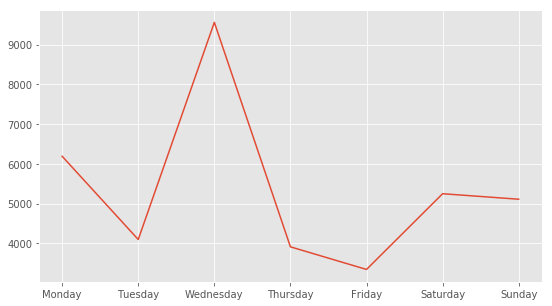

In [47]:
fig, ax = plt.subplots(figsize=(9,5))
plt.plot(weekdays, weekday_expenses)

### Mean sum spend within each weekday
Seems like I spend A LOT on Wednesdays :)

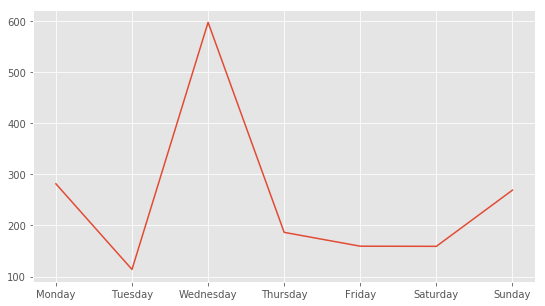

In [48]:
fig, ax = plt.subplots(figsize=(9,5))
plt.plot(weekdays, mean_weekday_expenses)

### Find out the hour, or time range on which most money is spend


#### Create time ranges column

In [49]:
time_ranges = ["{}{}:00 - {}{}:59".format(i // 10, i % 10, (i + 1) // 10, (i + 1) % 10 ) for i in range(0, 24, 2)]
time_ranges

['00:00 - 01:59',
 '02:00 - 03:59',
 '04:00 - 05:59',
 '06:00 - 07:59',
 '08:00 - 09:59',
 '10:00 - 11:59',
 '12:00 - 13:59',
 '14:00 - 15:59',
 '16:00 - 17:59',
 '18:00 - 19:59',
 '20:00 - 21:59',
 '22:00 - 23:59']

In [50]:
times = [int("".join(list(time)[:2])) for time in expenses.time[:10]]
times

[18, 18, 14, 13, 0, 19, 18, 15, 18, 0]

In [51]:
expenses['time_range'] = [time_ranges[int("".join(list(time)[:2])) // 2] for time in expenses.time]
expenses.head()

,date,time,category,description,transaction,abs,currency,balance,weekday,time_range
0,04.12.2018,18:47,PUBLIC TRANSPORT,"PUBLIC TRANSPORT: PrivatQR, ID платежу 886558795",-2.50,2.50,грн,762.17,Tuesday,18:00 - 19:59
1,04.12.2018,18:34,Інше,"Депозит через POS-терминал, ПЕРЕВОД СРЕДСТВ: H...",634.00,634.00,грн,764.67,Tuesday,18:00 - 19:59
2,04.12.2018,14:33,FOOD,"FOOD: FOOD, Львiв, вул. Пiд Дубом, 7",-63.59,63.59,грн,130.67,Tuesday,14:00 - 15:59
3,04.12.2018,13:15,Інше,Оплата в інтернет-магазині,-265.00,265.00,грн,194.26,Tuesday,12:00 - 13:59
4,04.12.2018,00:54,FUN,"FUN: ITUNES.COM/BILL, ITUNES.COM",-70.54,2.49,дол,459.26,Tuesday,00:00 - 01:59


In [52]:
 expenses.groupby(['time_range'])['transaction'].sum().abs()

time_range
00:00 - 01:59      706.29
02:00 - 03:59      273.53
04:00 - 05:59      129.45
08:00 - 09:59     1494.07
10:00 - 11:59      633.65
12:00 - 13:59     4306.94
14:00 - 15:59     2153.02
16:00 - 17:59    14029.09
18:00 - 19:59     8612.31
20:00 - 21:59     3285.14
22:00 - 23:59     1851.95
Name: transaction, dtype: float64

### Total sum spend within each time range

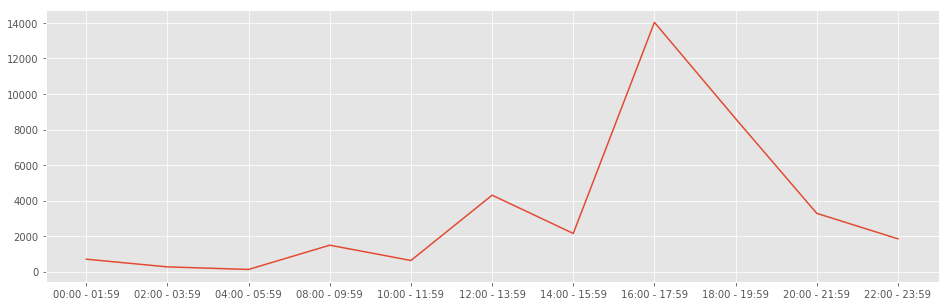

In [53]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.groupby(['time_range'])['transaction'].sum().abs())


### Mean sum spend within each time range
Seems like I spend most of my money during the evening

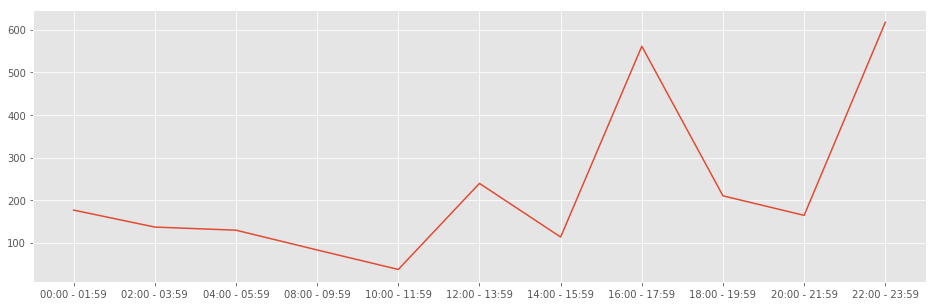

In [54]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.groupby(['time_range'])['transaction'].mean().abs())

## Mean spendings withing each time range FOR EACH category

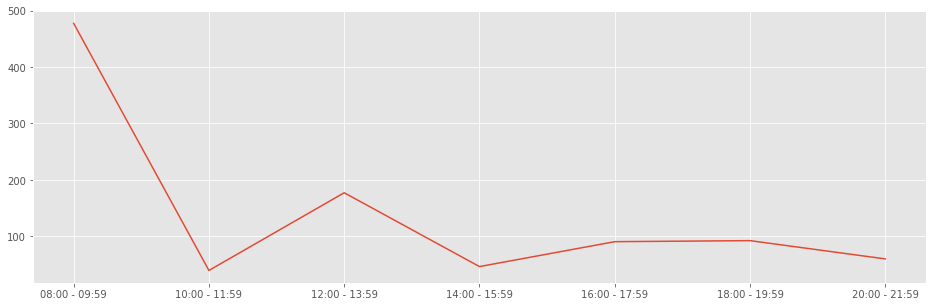

In [55]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'FOOD'].groupby(['time_range'])['transaction'].mean().abs())

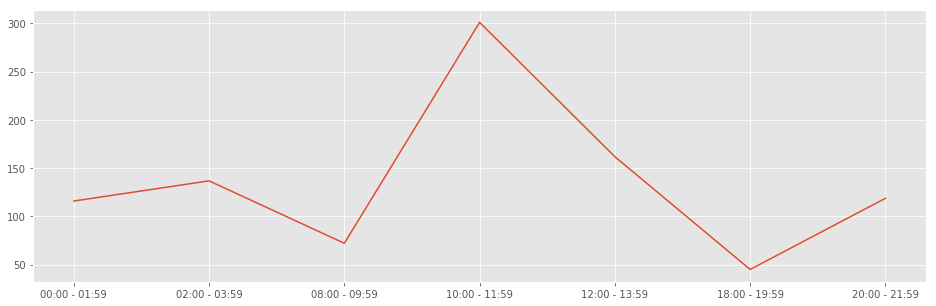

In [56]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'TAXI'].groupby(['time_range'])['transaction'].mean().abs())

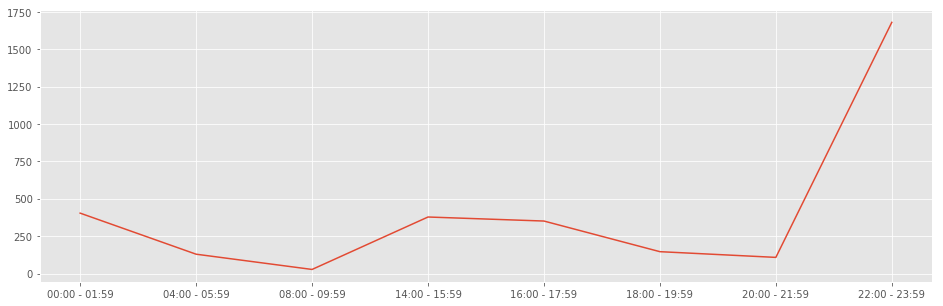

In [57]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'CAFE'].groupby(['time_range'])['transaction'].mean().abs())

In [58]:
expenses.loc[expenses['category'] == 'CAFE']

,date,time,category,description,transaction,abs,currency,balance,weekday,time_range
20,01.12.2018,19:22,CAFE,"CAFE: CAFE, Львiв, вул. Братв Рогатинцв, 5",-155.00,155.00,грн,238.32,Saturday,18:00 - 19:59
22,01.12.2018,19:07,CAFE,"CAFE: CAFE Салалат, Львiв, Кривая Липа, 7",-150.00,150.00,грн,318.32,Saturday,18:00 - 19:59
31,29.11.2018,08:59,CAFE,"CAFE: CAFE Альтернативна CAFE, Львiв, Коперник...",-25.00,25.00,грн,366.21,Thursday,08:00 - 09:59
66,11.11.2018,21:23,CAFE,"CAFE: KOELN AIRPORT IDA UND, KOELN",-126.60,3.95,євро,837.01,Sunday,20:00 - 21:59
69,11.11.2018,16:23,CAFE,"CAFE: ANTIK BRAUHAUS, KOLN",-1153.85,36.00,євро,295.66,Sunday,16:00 - 17:59
78,10.11.2018,17:43,CAFE,"CAFE: CASUALFOOD PLAZA T2, FRANKFURT",-80.13,2.50,євро,1324.51,Saturday,16:00 - 17:59
79,10.11.2018,17:31,CAFE,"CAFE: McDonald's, Frankfurt",-146.79,4.58,євро,1404.64,Saturday,16:00 - 17:59
82,09.11.2018,16:17,CAFE,"CAFE: REST PRADO, LISBOA",-641.03,20.00,євро,330.28,Friday,16:00 - 17:59
95,06.11.2018,15:22,CAFE,"CAFE: PASTA CAFE, LISBOA",-511.25,15.90,євро,2388.31,Tuesday,14:00 - 15:59
101,04.11.2018,22:30,CAFE,"CAFE: CHURRASQUEIR MARQUES, LISBOA",-1679.61,51.90,євро,1905.81,Sunday,22:00 - 23:59


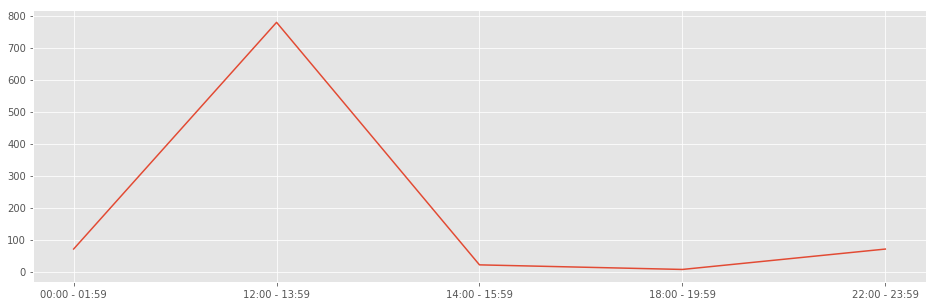

In [59]:
fig, ax = plt.subplots(figsize=(16,5))
plt.plot(expenses.loc[expenses['category'] == 'FUN'].groupby(['time_range'])['transaction'].mean().abs())

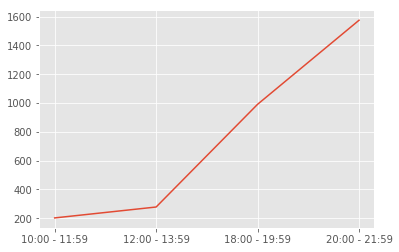

In [60]:
plt.plot(expenses.loc[expenses['category'] == 'Видача готівки'].groupby(['time_range'])['transaction'].mean().abs())

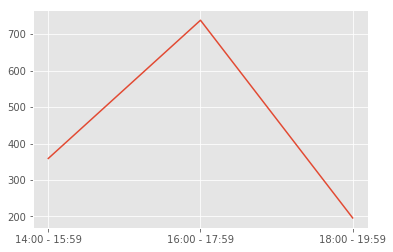

In [61]:
plt.plot(expenses.loc[expenses['category'] == 'CLOTHES'].groupby(['time_range'])['transaction'].mean().abs())

## Predicting expenses

In [62]:
data_numerical = pd.get_dummies(expenses)

In [63]:
data_numerical.head()

,transaction,abs,balance,date_01.10.2018,date_01.11.2018,date_01.12.2018,date_02.10.2018,date_02.11.2018,date_02.12.2018,date_03.11.2018,...,time_range_02:00 - 03:59,time_range_04:00 - 05:59,time_range_08:00 - 09:59,time_range_10:00 - 11:59,time_range_12:00 - 13:59,time_range_14:00 - 15:59,time_range_16:00 - 17:59,time_range_18:00 - 19:59,time_range_20:00 - 21:59,time_range_22:00 - 23:59
0,-2.50,2.50,762.17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,634.00,634.00,764.67,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-63.59,63.59,130.67,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-265.00,265.00,194.26,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-70.54,2.49,459.26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
transaction_amount = data_numerical["transaction"]
data_numerical.drop(columns="transaction")

train_set, test_set = np.split(
    data_numerical.sample(frac=1),
    [int(.75*len(data_numerical))]
)

train_y, test_y = np.split(
    transaction_amount.sample(frac=1),
    [int(.75*len(data_numerical))]
)

In [65]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded_train_y = lab_enc.fit_transform(train_y)
encoded_test_y = lab_enc.fit_transform(test_y)

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty = 'l1',).fit(train_set, encoded_train_y)
log_reg.score(train_set, encoded_train_y)
log_reg.coef_
log_reg.intercept_ 

/Users/tanyabatsenko/anaconda/envs/py36/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tanyabatsenko/anaconda/envs/py36/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/tanyabatsenko/anaconda/envs/py36/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([ 0.        ,  0.        ,  0.        , -2.55125087, -2.31011505,
       -1.47919889, -1.49035682,  0.        , -2.59141173,  0.        ,
        0.        ,  0.        , -4.1700924 , -1.65953503,  0.        ,
       -0.34029892,  0.        , -4.00987575, -4.76073982, -4.85115283,
        0.        , -3.88414225,  0.        , -1.12551287,  0.        ,
        0.        , -0.53317134, -1.93563869,  0.        , -4.18714588,
       -3.27900826, -4.52032637,  0.        , -2.66433454,  0.        ,
        0.        , -2.40236431, -2.38241315,  0.        , -3.85347764,
        0.        , -0.89918501,  0.        ,  0.        , -1.454661  ,
       -0.19489167,  0.        ,  0.        ,  0.        ,  0.        ,
       -2.92986651, -0.32317946,  0.        ,  0.        , -3.68918103,
        0.        , -2.68518696, -3.69020417, -3.5015446 , -3.64533945,
       -2.14631425,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.60925532, -3.0720061 , -3.9097558 , -1.90

In [67]:
lr_train_predicted = log_reg.predict(train_set)
lr_test_predicted = log_reg.predict(test_set)

In [68]:
from sklearn.metrics import accuracy_score

print('LogisticRegression scores:\n Train: {}\n Test: {}'.format(
    accuracy_score(encoded_train_y, lr_train_predicted), accuracy_score(encoded_test_y, lr_test_predicted)))

LogisticRegression scores:
 Train: 0.230158730159
 Test: 0.0


### Trying XGboost

In [69]:
# To prevent kernel from crashing because of some MacOS problem when running xgboost
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [70]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, gamma=0.001, subsample=0.80,
                           colsample_bytree=1, max_depth=15)

In [71]:
xg_reg.fit(train_set, encoded_train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.001, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [72]:
xgb_train_predicted = xg_reg.predict(train_set)
xgb_test_predicted = xg_reg.predict(test_set)

In [73]:
print('xgBoost scores:\n Train: {}\n Test: {}'.format(
    accuracy_score(encoded_train_y, xgb_train_predicted), accuracy_score(encoded_test_y, xgb_test_predicted)))

xgBoost scores:
 Train: 0.238095238095
 Test: 0.0


### Now let's try to drop 'date' and 'time' columns

In [74]:
new_expenses = expenses.drop(columns=['date', 'time'])

data_numerical = pd.get_dummies(new_expenses)

data_numerical.head()

,transaction,abs,balance,category_CAFE,category_CLOTHES,category_FOOD,category_FUN,category_HEALTH,category_PUBLIC TRANSPORT,category_TAXI,...,time_range_02:00 - 03:59,time_range_04:00 - 05:59,time_range_08:00 - 09:59,time_range_10:00 - 11:59,time_range_12:00 - 13:59,time_range_14:00 - 15:59,time_range_16:00 - 17:59,time_range_18:00 - 19:59,time_range_20:00 - 21:59,time_range_22:00 - 23:59
0,-2.50,2.50,762.17,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,634.00,634.00,764.67,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-63.59,63.59,130.67,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-265.00,265.00,194.26,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-70.54,2.49,459.26,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
transaction_amount = data_numerical["transaction"]
data_numerical.drop(columns="transaction")

train_set, test_set = np.split(
    data_numerical.sample(frac=1),
    [int(.75*len(data_numerical))]
)

train_y, test_y = np.split(
    transaction_amount.sample(frac=1),
    [int(.75*len(data_numerical))]
)

In [76]:

lab_enc = preprocessing.LabelEncoder()
encoded_train_y = lab_enc.fit_transform(train_y)
encoded_test_y = lab_enc.fit_transform(test_y)

In [77]:
log_reg = LogisticRegression(penalty = 'l1',).fit(train_set, encoded_train_y)
log_reg.score(train_set, encoded_train_y)
log_reg.coef_
log_reg.intercept_ 

array([-1.64881145,  0.        ,  0.        , -2.18787324, -3.96450939,
       -2.24584304,  0.        ,  0.        , -2.2868778 ,  0.        ,
       -3.2456751 , -4.1389692 ,  0.        ,  0.        , -0.24520764,
        0.        , -4.62179764,  0.        ,  0.        , -1.46880331,
       -2.66850719, -1.98249214,  0.        , -3.83320337,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -3.98312419,  0.        ,  0.        ,  0.        , -4.1024019 ,
       -0.71899803, -0.66309333, -4.54069074,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -2.54154354,  0.        ,
       -0.28104669,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -3.37330142,  0.        ,  0.        ,
        0.        , -1.38065278, -1.69717847,  0.        , -1.26103049,
        0.        ,  0.        , -2.37704933,  0.        , -3.12022046,
       -4.12879487,  0.        ,  0.        ,  0.        , -2.76

In [78]:
lr_train_predicted = log_reg.predict(train_set)
lr_test_predicted = log_reg.predict(test_set)

In [79]:
print('LogisticRegression scores:\n Train: {}\n Test: {}'.format(
    accuracy_score(encoded_train_y, lr_train_predicted), accuracy_score(encoded_test_y, lr_test_predicted)))

LogisticRegression scores:
 Train: 0.174603174603
 Test: 0.0


In [80]:
xg_reg.fit(train_set, encoded_train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.001, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [81]:
xgb_train_predicted = xg_reg.predict(train_set)
xgb_test_predicted = xg_reg.predict(test_set)

In [82]:
print('xgBoost scores:\n Train: {}\n Test: {}'.format(
    accuracy_score(encoded_train_y, xgb_train_predicted), accuracy_score(encoded_test_y, xgb_test_predicted)))

xgBoost scores:
 Train: 0.222222222222
 Test: 0.0


# Conclusions 

Categories classification done by PrivatBank is poor

Too little data to predict future expenses, too many features.

A lot of insights from analyzing expenses withing different time-ranges: weekdays, hours
     - I spend most money on Wednesdays
     - I tend to spend the most at the second half of the day
     - I spend most money on Cafes at the late evenings - same as on taxi
     - I buy clothes on at the second part of the day